In [73]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import sklearn as sl
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [74]:
path = r"C:\Users\Δημήτρης\OneDrive\Έγγραφα\Giannis\MENG\semester8\Data Analysis\python_codes\Data Analysis_2024 1st Case_Data.csv"
df1 = pd.read_csv(path, index_col=False)
exr    = [2001, 2014]
exc     = ['Country', 'Status']

df2 = df1.drop(columns = exc)
cond1, cond2 = df2['Year'] == exr[0], df2['Year'] == exr[1]
df  = df2[~cond1]
df  = df[~cond2]

C:\Users\Δημήτρης\AppData\Local\Temp\ipykernel_15808\1715182839.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df  = df[~cond2]


In [75]:
predictors = df.columns.tolist()
predictors = [x for x in predictors if x != 'Life expectancy ']
Y = pd.DataFrame(df['Life expectancy '])
X = pd.DataFrame(df[predictors])


In [76]:
X

,Year,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.3,0.479,10.1
2,2013,268,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,2012,272,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,18.0,0.463,9.8
4,2011,275,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,0.454,9.5
5,2010,279,0.01,79.679367,66,1989,16.7,102,66,9.20,66,0.1,553.328940,2883167.0,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,2005,717,4.14,8.717409,65,420,27.5,43,69,6.44,68,30.3,444.765750,129432.0,9.0,0.406,9.3
1644,2004,723,4.36,0.000000,68,31,27.1,42,67,7.13,65,33.6,454.366654,12777511.0,9.4,0.407,9.2
1645,2003,715,4.06,0.000000,7,998,26.7,41,7,6.52,68,36.7,453.351155,12633897.0,9.9,0.418,9.5
1646,2002,73,4.43,0.000000,73,304,26.3,40,73,6.53,71,39.8,57.348340,125525.0,1.3,0.427,10.0


1: for multiple linear regression

In [77]:
k = 5
kf = KFold(n_splits=k, shuffle=False)
model = linear_model.LinearRegression()
cv_scores = cross_val_score(model, X, Y,scoring='neg_mean_squared_error', cv=kf)

print("Cross-validation scores:", np.abs(cv_scores))

# Calculate and print the mean of the cross-validation scores
print("Mean CV Score:", np.abs(cv_scores.mean()))

Cross-validation scores: [14.48941014 17.11515085 15.31624874 11.46951836 18.56152826]
Mean CV Score: 15.390371268842511


2: for multiple linear regression with the selected variables

In [78]:
# results obtained from the forward_selector_2.py file
predictors = ['Schooling', 'Income composition of resources', 'Adult Mortality', ' HIV_AIDS', ' BMI ', ' thinness 5-9 years', 'GDP', 'Alcohol', 'Diphtheria ', 'Year']
X = pd.DataFrame(df[predictors])

cv_scores = cross_val_score(model, X, Y,scoring='neg_mean_squared_error', cv=kf)

print("Cross-validation scores:", np.abs(cv_scores))
print("Mean CV Score:", np.abs(cv_scores.mean()))

Cross-validation scores: [14.39421569 14.98312762 14.34284801 11.26617029 18.14348596]
Mean CV Score: 14.625969513858072


In [79]:
loo = LeaveOneOut()
cv_scores = cross_val_score(model, X, Y, cv=loo, scoring='neg_mean_squared_error')


print("Cross-validation scores:", np.abs(cv_scores))
print("Mean CV Score:", np.abs(cv_scores.mean()))


Cross-validation scores: [ 7.4061816   5.23530006  7.0321505  ... 37.27744344 20.14571792
 73.81614496]
Mean CV Score: 13.416323050089998


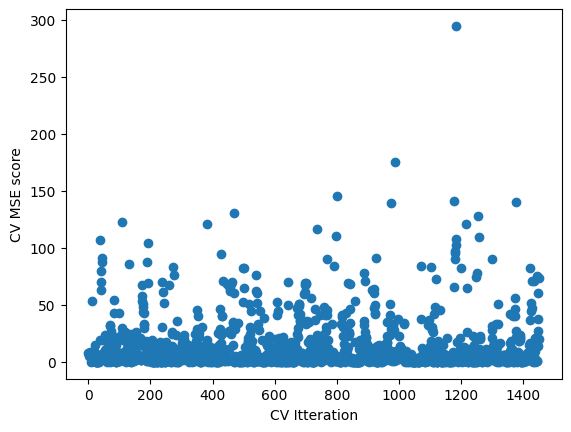

In [80]:
xx = np.arange(0,len(cv_scores))
plt.scatter(xx,-cv_scores)
plt.xlabel('CV Itteration')
plt.ylabel('CV MSE score')
plt.show()



Part B

In [81]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [82]:
predictors = df.columns.tolist()
predictors = [x for x in predictors if x != 'Life expectancy ' and x != 'Year']
X = pd.DataFrame(df[predictors])

In [83]:
X

,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness 5-9 years,Income composition of resources,Schooling
0,263,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.3,0.479,10.1
2,268,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,272,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,18.0,0.463,9.8
4,275,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,0.454,9.5
5,279,0.01,79.679367,66,1989,16.7,102,66,9.20,66,0.1,553.328940,2883167.0,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,717,4.14,8.717409,65,420,27.5,43,69,6.44,68,30.3,444.765750,129432.0,9.0,0.406,9.3
1644,723,4.36,0.000000,68,31,27.1,42,67,7.13,65,33.6,454.366654,12777511.0,9.4,0.407,9.2
1645,715,4.06,0.000000,7,998,26.7,41,7,6.52,68,36.7,453.351155,12633897.0,9.9,0.418,9.5
1646,73,4.43,0.000000,73,304,26.3,40,73,6.53,71,39.8,57.348340,125525.0,1.3,0.427,10.0


In [118]:
ymean = np.mean(Y.values)
response = []
for i in Y.values:
    if i >= ymean:
        response.append(1)
    elif i<ymean:
        response.append(0)

print(response)
print(ymean)


X_train, X_test, y_train, y_test = train_test_split(X, response,  test_size=0.2, random_state = 0)
print(np.mean(y_train))
print([len(X_train), len(X_test)])
print([len(y_train), len(y_test)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Logistic Regression

In [127]:

yvals = Y.values
convdata = np.ln()

model = LogisticRegression()
model.fit(X_train, y_train)
y_probtest = model.predict_proba(X_test)[:, 1]
y_probtrng = model.predict_proba(X_train)[:, 1]

y_pred05test = (y_probtest >= 0.5).astype(int)
y_pred04test = (y_probtest >= 0.4).astype(int)
y_pred06test = (y_probtest >= 0.6).astype(int)

y_pred05trng = (y_probtrng >= 0.5).astype(int)
y_pred04trng = (y_probtrng >= 0.4).astype(int)
y_pred06trng = (y_probtrng >= 0.6).astype(int)


# Calculate accuracy
accuracy05 = accuracy_score(y_test, y_pred05test)
accuracy05trng = accuracy_score(y_train, y_pred05trng)
accuracy04 = accuracy_score(y_test, y_pred04test)
accuracy04trng = accuracy_score(y_train, y_pred04trng)
accuracy06 = accuracy_score(y_test, y_pred06test)
accuracy06trng = accuracy_score(y_train, y_pred06trng)

print("Accuracy 0.5:", accuracy05)
print("Accuracy 0.5 trng:", accuracy05trng)
print("Accuracy 0.4:", accuracy04)
print("Accuracy 0.4 trng:", accuracy04trng)
print("Accuracy 0.6:", accuracy06)
print("Accuracy 0.6 trng:", accuracy06trng)


# # Print classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
# print(y_prob)

Accuracy 0.5: 0.7869415807560137
Accuracy 0.5 trng: 0.7648578811369509
Accuracy 0.4: 0.8006872852233677
Accuracy 0.4 trng: 0.7691645133505599
Accuracy 0.6: 0.7457044673539519
Accuracy 0.6 trng: 0.7622739018087855


c:\Users\Δημήτρης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
intercept = model.intercept_[0]
coefficients = model.coef_[0]
vals = intercept + list(coefficients)
namess = ['intercept'] + predictors

for name, val in zip(namess, vals):
    print(f"{name} & {val} \\ ")



intercept & -0.007000520921027909 \ 
Adult Mortality & 4.509369164369928e-06 \ 
Alcohol & 0.0018823703172468089 \ 
percentage expenditure & -0.0006821547241836393 \ 
Hepatitis B & -6.713502304357435e-07 \ 
Measles  & 0.0001183267813140374 \ 
 BMI  & -0.001684707663109324 \ 
under-five deaths  & -0.000669616020706295 \ 
Polio & -6.206705483465299e-05 \ 
Total expenditure & -0.0006882113123811893 \ 
Diphtheria  & -0.00019803544968327472 \ 
 HIV_AIDS & 0.00037375557564192044 \ 
GDP & -1.2360829697476246e-05 \ 
Population & -0.00018765686142681906 \ 
 thinness 5-9 years & -1.2996954265909375e-05 \ 
Income composition of resources & -5.8258310262034946e-05 \ 


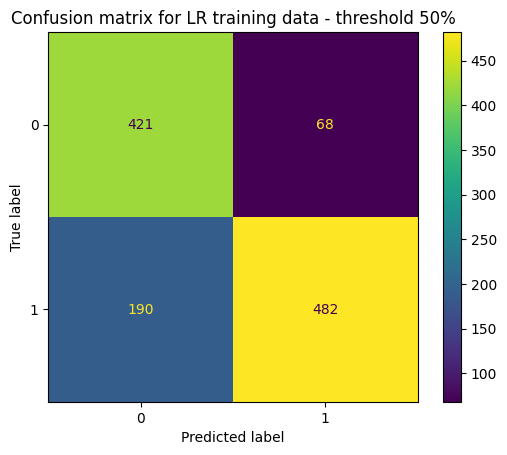

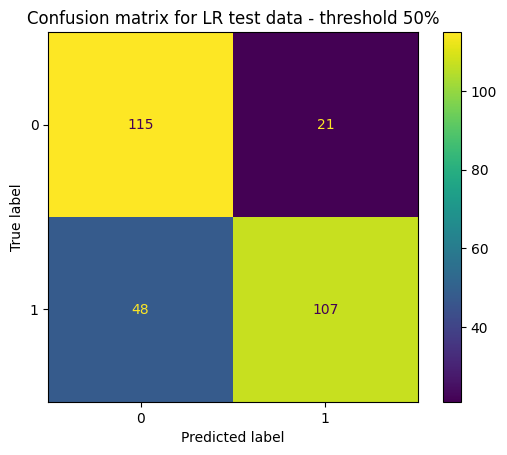

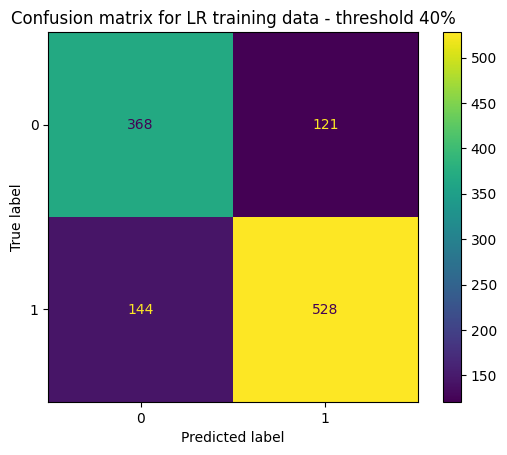

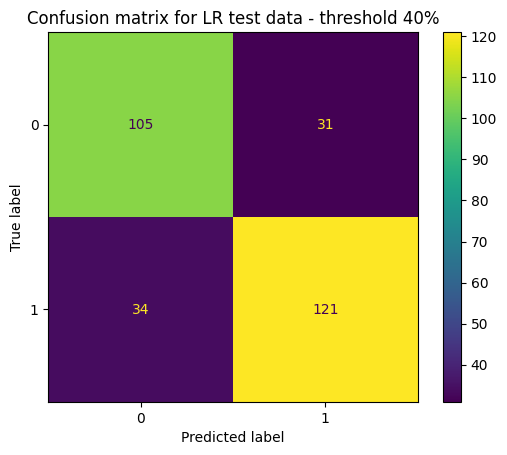

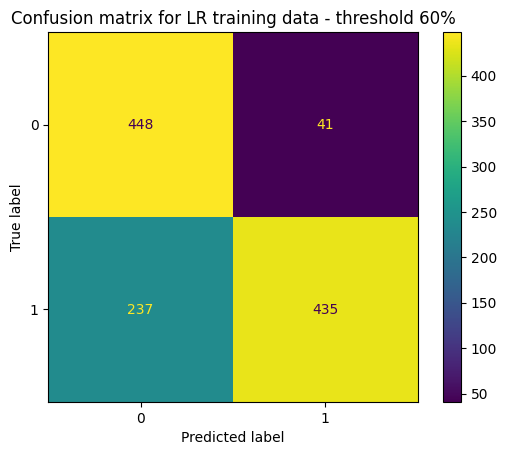

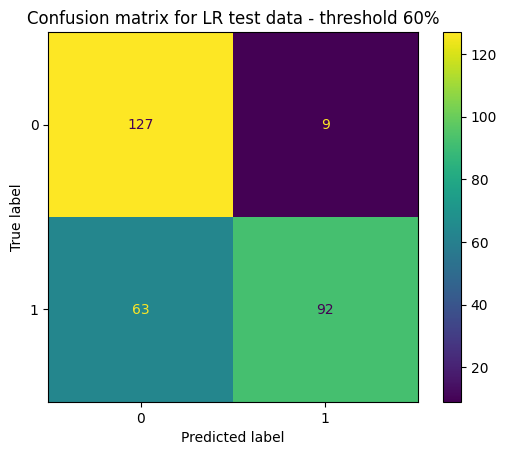

In [86]:

data = {
    'ypred05trng': y_pred05trng,
    'ypred04trng': y_pred04trng,
    'ypred06trng': y_pred06trng,
    'ypred05test': y_pred05test,
    'ypred04test': y_pred04test,
    'ypred06test': y_pred06test
}


for i in [5, 4, 6]:
    trng_key = f'ypred0{i}trng'
    test_key = f'ypred0{i}test'
    trngpred = data.get(trng_key)
    testpred = data.get(test_key)
    cm_trng  = confusion_matrix(y_train, trngpred)
    cm_test  = confusion_matrix(y_test, testpred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_trng, display_labels = [0, 1])
    cm_display.plot()
    plt.title(f'Confusion matrix for LR training data - threshold {i}0%')
    name = f'LR_trng_{i}0.png'
    plt.savefig(name)
    plt.show()
    

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
    cm_display.plot()
    plt.title(f'Confusion matrix for LR test data - threshold {i}0%')
    name = f'LR_test_{i}0.png'
    plt.savefig(name)
    plt.show()
    
# print(np.cumsum(y_test))


LDA

In [87]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_probtest = lda.predict_proba(X_test)[:, 1] 
y_probtrng = lda.predict_proba(X_train)[:, 1]

y_pred05test = (y_probtest >= 0.5).astype(int)
y_pred04test = (y_probtest >= 0.4).astype(int)
y_pred06test = (y_probtest >= 0.6).astype(int)

y_pred05trng = (y_probtrng >= 0.5).astype(int)
y_pred04trng = (y_probtrng >= 0.4).astype(int)
y_pred06trng = (y_probtrng >= 0.6).astype(int)


# Calculate accuracy
accuracy05 = accuracy_score(y_test, y_pred05test)
accuracy04 = accuracy_score(y_test, y_pred04test)
accuracy06 = accuracy_score(y_test, y_pred06test)
print("Accuracy 0.5:", accuracy05)
print("Accuracy 0.4:", accuracy04)
print("Accuracy 0.6:", accuracy06)

Accuracy 0.5: 0.9175257731958762
Accuracy 0.4: 0.8934707903780069
Accuracy 0.6: 0.9106529209621993


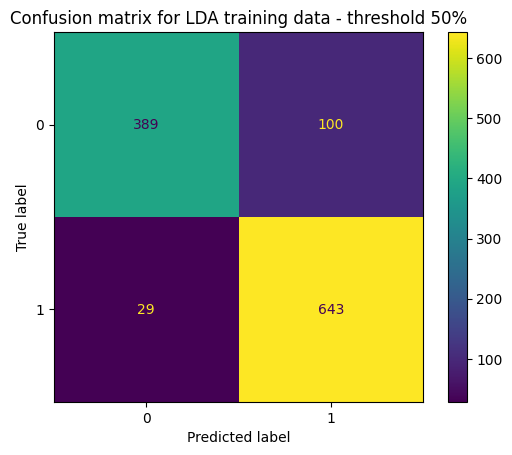

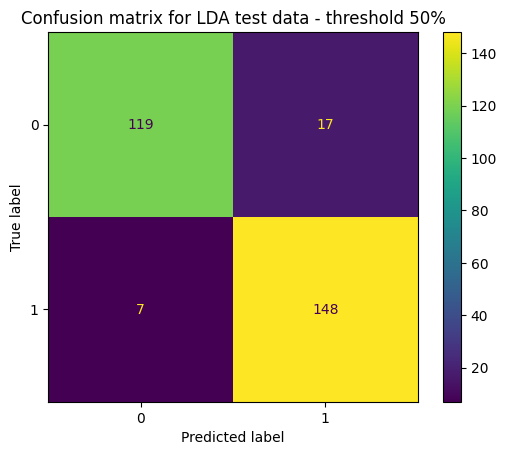

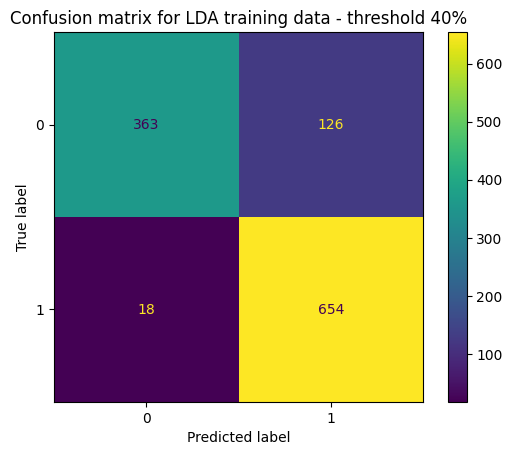

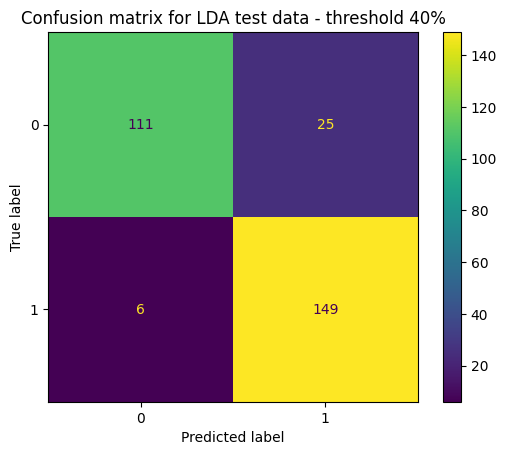

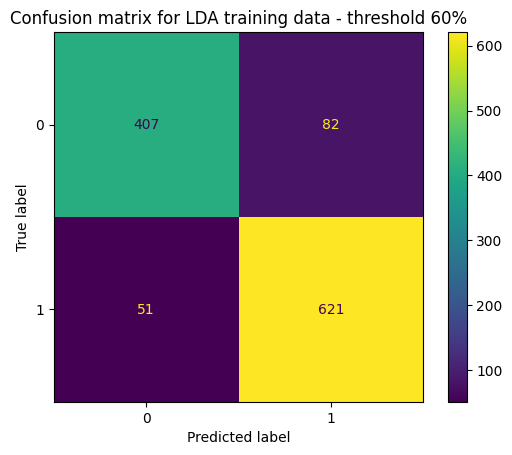

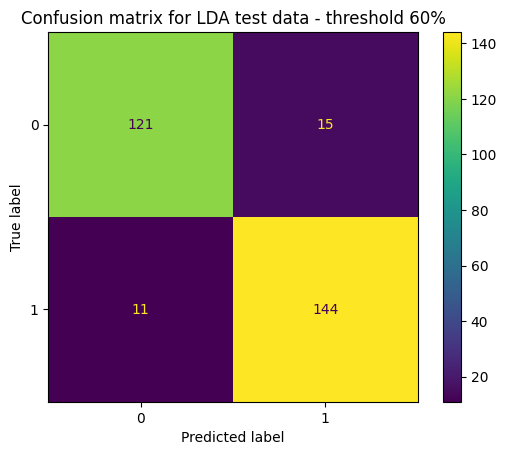

In [88]:
data = {
    'ypred05trng': y_pred05trng,
    'ypred04trng': y_pred04trng,
    'ypred06trng': y_pred06trng,
    'ypred05test': y_pred05test,
    'ypred04test': y_pred04test,
    'ypred06test': y_pred06test
}


for i in [5, 4, 6]:
    trng_key = f'ypred0{i}trng'
    test_key = f'ypred0{i}test'
    trngpred = data.get(trng_key)
    testpred = data.get(test_key)
    cm_trng  = confusion_matrix(y_train, trngpred)
    cm_test  = confusion_matrix(y_test, testpred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_trng, display_labels = [0, 1])
    cm_display.plot()
    plt.title(f'Confusion matrix for LDA training data - threshold {i}0%')
    name = f'LDA_trng_{i}0.png'
    plt.savefig(name)
    plt.show()
    
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
    cm_display.plot()
    plt.title(f'Confusion matrix for LDA test data - threshold {i}0%')
    name = f'LDA_test_{i}0.png'
    plt.savefig(name)
    plt.show()
    


KNN

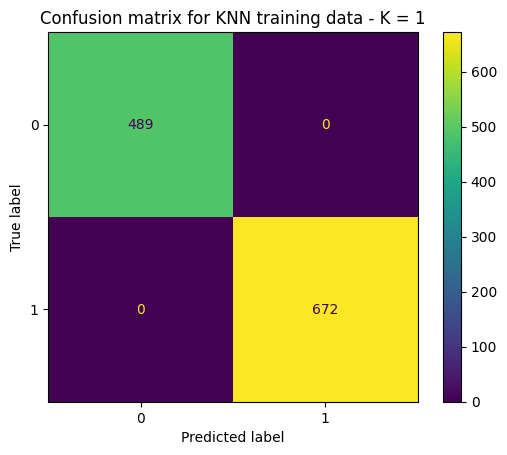

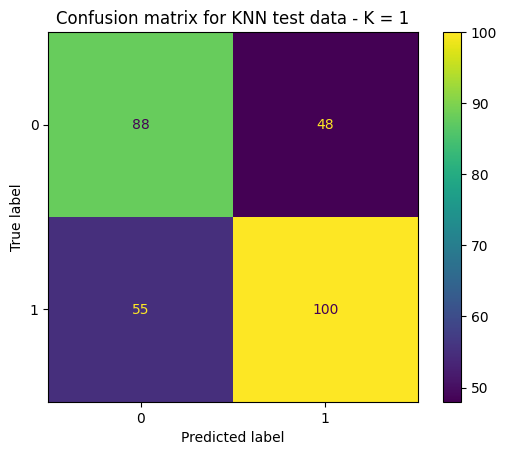

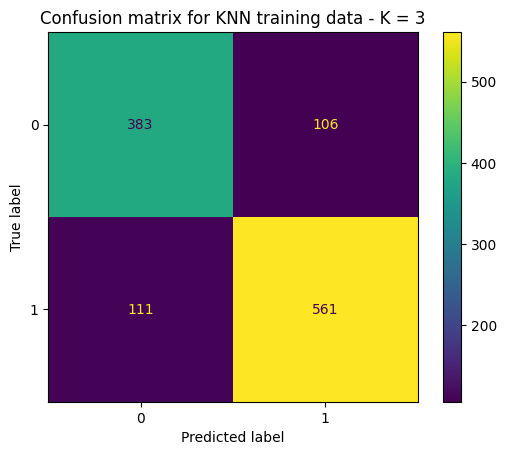

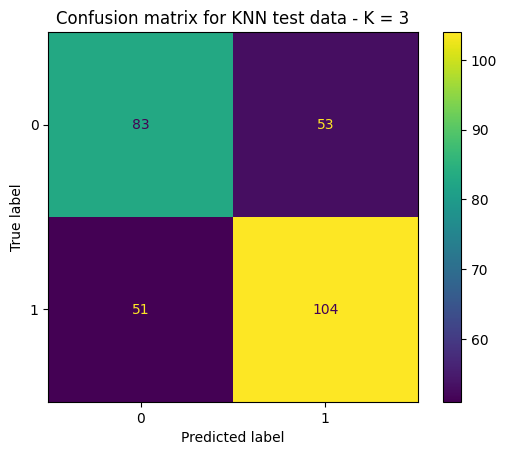

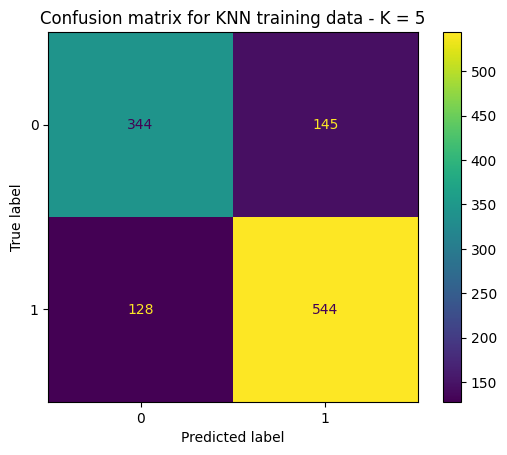

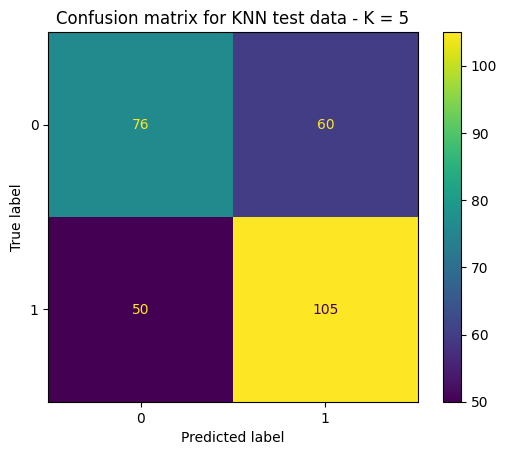

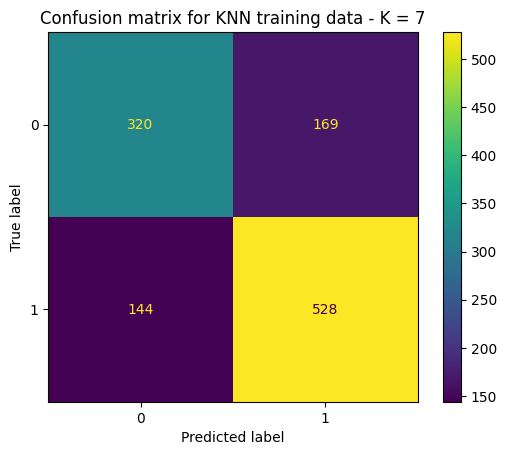

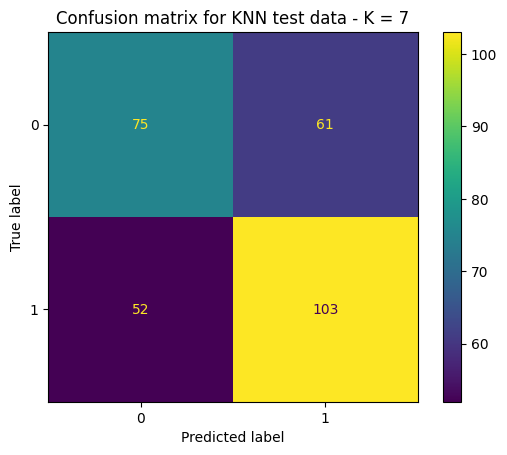

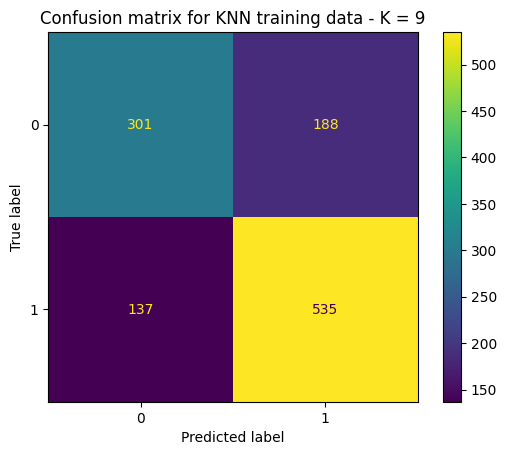

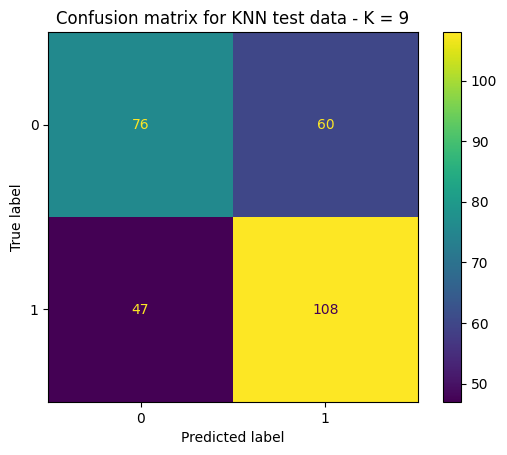

   k-neighbor  accuracy
0           1  0.646048
1           3  0.642612
2           5  0.621993
3           7  0.611684
4           9  0.632302


In [89]:
neighbors = [1, 3, 5, 7, 9]
results = pd.DataFrame({'k-neighbor': [],
           'accuracy': [],
           })

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)  
    knn.fit(X_train, y_train)
    y_predtest = knn.predict(X_test)
    y_predtrng = knn.predict(X_train)
    accuracy = accuracy_score(y_test, y_predtest)
    nr = {'k-neighbor': i,
           'accuracy': accuracy,
           }
    results.loc[len(results)] = nr

    cm_trng  = confusion_matrix(y_train, y_predtrng)
    cm_test  = confusion_matrix(y_test, y_predtest)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_trng, display_labels = [0, 1])
    cm_display.plot()
    plt.title(f'Confusion matrix for KNN training data - K = {i}')
    name = f'KNN_trng_K{i}.png'
    plt.savefig(name)
    plt.show()

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
    cm_display.plot()
    plt.title(f'Confusion matrix for KNN test data - K = {i}')
    name = f'KNN_test_K{i}.png'
    plt.savefig(name)
    plt.show()
    

print(results)
